# Titanic Notebook for SageMaker
Contributors:

**Egemen Alkan**: Prepared the Titanic dataset for AWS SageMaker.
Uploaded training and testing data to S3.
Visualized and compared model results.
Objective:
Prepare the Titanic dataset for AWS SageMaker and train a machine learning model using the platform.

Workflow Summary:

Data Preparation:
Cleaned and combined Titanic features into training and testing datasets.
Uploaded preprocessed datasets to an S3 bucket for SageMaker.
Model Training:
Used SageMaker's built-in SKLearn estimator to train a model.
Evaluation:
Evaluated the model on testing data and visualized results using confusion matrices, precision-recall, and ROC curves.


## SageMaker Data Handling Script

This script is designed to handle the upload of preprocessed Titanic dataset files to Amazon S3, a cloud-based storage solution. The uploaded data will later be used for machine learning tasks in AWS SageMaker.

In [ ]:
# Import required libraries
import boto3  # AWS SDK for interacting with S3 and other AWS services
import pandas as pd  # For loading and manipulating data
from sagemaker import get_execution_role, Session  # Tools for managing SageMaker sessions and roles

# Set up SageMaker session and role
role = get_execution_role()  # Retrieves the IAM role associated with the SageMaker session
sess = Session()  # Initializes a SageMaker session to manage S3 uploads and other resources

In [ ]:
# Load preprocessed data from local files
X_train = pd.read_csv("X_train.csv")  # Load the training feature set
X_test = pd.read_csv("X_test.csv")  # Load the testing feature set
y_train = pd.read_csv("y_train.csv")  # Load the training labels
y_test = pd.read_csv("y_test.csv")  # Load the testing labels

# Define file paths for saving combined and individual datasets
train_path = "train.csv"  # Path for combined training data (features + labels)
test_path = "test.csv"  # Path for combined testing data (features + labels)
X_train_path = "X_train.csv"  # Path for training features
y_train_path = "y_train.csv"  # Path for training labels
X_test_path = "X_test.csv"  # Path for testing features
y_test_path = "y_test.csv"  # Path for testing labels

In [ ]:
# Combine X_train and y_train into a single file for SageMaker input
# SageMaker typically requires training data in a combined format
train_combined = pd.concat([y_train, X_train], axis=1)  # Concatenate labels and features horizontally
train_combined.to_csv(train_path, index=False)  # Save the combined training data to `train.csv`
s3_train_path = sess.upload_data(
    train_path, bucket="ea-titanic-bucket", key_prefix="processed/train"
)  # Upload the combined file to S3
print(f"Training data uploaded to {s3_train_path}")  # Output the S3 path for verification

# Save and upload individual training files
X_train.to_csv("train_X_train.csv", index=False)  # Save training features locally
s3_X_train_path = sess.upload_data(
    "train_X_train.csv", bucket="ea-titanic-bucket", key_prefix="processed/train"
)  # Upload training features to S3
print(f"X_train uploaded to {s3_X_train_path}")  # Output the S3 path for X_train

y_train.to_csv("train_y_train.csv", index=False)  # Save training labels locally
s3_y_train_path = sess.upload_data(
    "train_y_train.csv", bucket="ea-titanic-bucket", key_prefix="processed/train"
)  # Upload training labels to S3
print(f"y_train uploaded to {s3_y_train_path}")  # Output the S3 path for y_train

In [ ]:
# Combine X_test and y_test into a single file for potential testing later
# Similar to training data, testing data is also combined for compatibility
test_combined = pd.concat([y_test, X_test], axis=1)  # Concatenate labels and features horizontally
test_combined.to_csv(test_path, index=False)  # Save the combined testing data to `test.csv`
s3_test_path = sess.upload_data(
    test_path, bucket="ea-titanic-bucket", key_prefix="processed/test"
)  # Upload the combined testing file to S3
print(f"Testing data uploaded to {s3_test_path}")  # Output the S3 path for verification

# Save and upload individual testing files
X_test.to_csv("test_X_test.csv", index=False)  # Save testing features locally
s3_X_test_path = sess.upload_data(
    "test_X_test.csv", bucket="ea-titanic-bucket", key_prefix="processed/test"
)  # Upload testing features to S3
print(f"X_test uploaded to {s3_X_test_path}")  # Output the S3 path for X_test

In [ ]:
y_test.to_csv("test_y_test.csv", index=False)  # Save testing labels locally
s3_y_test_path = sess.upload_data(
    "test_y_test.csv", bucket="ea-titanic-bucket", key_prefix="processed/test"
)  # Upload testing labels to S3
print(f"y_test uploaded to {s3_y_test_path}")  # Output the S3 path for y_test

# This script ensures the preprocessed Titanic dataset is saved locally and uploaded to S3 for use in AWS SageMaker workflows.
# The data is uploaded in both combined and individual formats to provide flexibility for various machine learning tasks.


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
Training data uploaded to s3://ea-titanic-bucket/processed/train/train.csv
X_train uploaded to s3://ea-titanic-bucket/processed/train/train_X_train.csv
y_train uploaded to s3://ea-titanic-bucket/processed/train/train_y_train.csv
Testing data uploaded to s3://ea-titanic-bucket/processed/test/test.csv
X_test uploaded to s3://ea-titanic-bucket/processed/test/test_X_test.csv
y_test uploaded to s3://ea-titanic-bucket/processed/test/test_y_test.csv


## Training job on SageMaker

Key Notes:
1. `entry_point`: This points to the Python script that contains the training logic. SageMaker runs this script during the training job.
2. `instance_type`: Specifies the compute resources (CPU/GPU and memory) allocated for the training job.
3. `sagemaker_session`: Handles the SageMaker environment, such as uploading scripts, managing jobs, and logging.
4. `hyperparameters`: Any parameters needed by the training script can be passed here, such as the S3 bucket and dataset key.
5. `fit`: Starts the training job using the provided dataset located in the S3 bucket.

This configuration allows you to run a Scikit-learn training job on SageMaker, leveraging its managed machine learning infrastructure.

In [ ]:
# Import the SKLearn Estimator class from SageMaker
from sagemaker.sklearn.estimator import SKLearn

# Define the SageMaker SKLearn Estimator
# This sets up an Estimator that uses a Scikit-learn training script (`train.py`) to train a model in SageMaker.
sklearn = SKLearn(
    entry_point="train.py",  # The path to your custom training script (e.g., `train.py`).
    role=role,  # The IAM role that allows SageMaker to access AWS resources (set earlier in the notebook/script).
    instance_type="ml.m5.large",  # Type of instance used for training (e.g., `ml.m5.large` provides balanced compute and memory).
    framework_version="1.0-1",  # The version of the Scikit-learn framework supported by SageMaker.
    sagemaker_session=sess,  # The SageMaker session object initialized earlier for managing SageMaker resources.
    hyperparameters={  # Custom hyperparameters to pass into the training script.
        "bucket": "ea-titanic-bucket",  # S3 bucket where the training dataset resides.
        "key": "titanic_cleaned.csv"  # S3 key (path) for the training dataset within the specified bucket.
    }
)

# Fit the model using the uploaded training data
# `fit` triggers the training process in SageMaker, using the uploaded data and the specified training script.
sklearn.fit({"train": s3_train_path})  # Specifies the S3 path of the training dataset (uploaded earlier).

INFO:sagemaker:Creating training-job with name: sagemaker-scikit-learn-2024-11-21-18-16-37-444


2024-11-21 18:16:40 Starting - Starting the training job...
2024-11-21 18:16:55 Starting - Preparing the instances for training...
2024-11-21 18:17:22 Downloading - Downloading input data...
2024-11-21 18:17:48 Downloading - Downloading the training image...
2024-11-21 18:18:44 Training - Training image download completed. Training in progress...2024-11-21 18:18:48,549 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2024-11-21 18:18:48,552 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-11-21 18:18:48,554 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2024-11-21 18:18:48,571 sagemaker_sklearn_container.training INFO     Invoking user training script.
2024-11-21 18:18:48,812 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-11-21 18:18:48,815 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2

# Deploy the Trained Model to an Endpoint
Key Notes:
1. **`deploy`**: This method creates a fully managed SageMaker endpoint for serving real-time predictions.
   - The endpoint uses the trained model to process inference requests.
   - It runs on the specified instance type with the specified number of instances (`initial_instance_count`).
2. **`endpoint_name`**: The unique name assigned to the deployed endpoint, used for sending inference requests.
3. **Environment Variable**: Storing the endpoint name in an environment variable allows easy access and reduces hardcoding, especially in multi-step pipelines or when invoking from other scripts.
4. **`ml.m5.large`**: Chosen for balanced compute and memory; adjust the instance type based on model size and expected inference load.

This script completes the deployment phase, making the trained model accessible through a real-time inference endpoint in SageMaker.

In [ ]:
import os  # Import the `os` module to manage environment variables and system operations

# Deploy the trained model
# The `deploy` method launches an endpoint in SageMaker for real-time inference using the trained model.
predictor = sklearn.deploy(
    instance_type="ml.m5.large",  # Specifies the instance type for the endpoint (e.g., `ml.m5.large` for balanced CPU and memory).
    initial_instance_count=1  # Number of instances to deploy for handling inference requests.
)
print("Model deployed successfully.")  # Confirm that the model has been deployed.

# Extract the endpoint name from the deployed predictor
# SageMaker assigns a unique endpoint name when the model is deployed.
endpoint_name = predictor.endpoint_name  # Retrieve the endpoint name for further use.
print(f"Deployed endpoint name: {endpoint_name}")  # Output the endpoint name to the console for reference.

# Set the endpoint name as an environment variable
# This ensures the endpoint name can be accessed easily by other parts of the script or external applications.
os.environ["SAGEMAKER_ENDPOINT_NAME"] = endpoint_name  # Store the endpoint name in the `SAGEMAKER_ENDPOINT_NAME` environment variable.
print(f"Environment variable 'SAGEMAKER_ENDPOINT_NAME' set to: {endpoint_name}")  # Confirm that the environment variable has been set.

INFO:sagemaker:Creating model with name: sagemaker-scikit-learn-2024-11-21-18-19-25-121
INFO:sagemaker:Creating endpoint-config with name sagemaker-scikit-learn-2024-11-21-18-19-25-121
INFO:sagemaker:Creating endpoint with name sagemaker-scikit-learn-2024-11-21-18-19-25-121


-------!Model deployed successfully.
Deployed endpoint name: sagemaker-scikit-learn-2024-11-21-18-19-25-121
Environment variable 'SAGEMAKER_ENDPOINT_NAME' set to: sagemaker-scikit-learn-2024-11-21-18-19-25-121


# **Invoke Endpoint for Model Predictions**

### **Key Notes:**

1. **Environment Variable**:
   - `SAGEMAKER_ENDPOINT_NAME`: Fetches the name of the deployed endpoint from an environment variable to ensure flexibility across different scripts.
   - Prevents hardcoding, making the script adaptable to varying endpoint configurations.

2. **SageMaker Client**:
   - Utilizes `boto3.client("sagemaker-runtime")` to interact with the SageMaker runtime for real-time inference.

3. **Dataset Serialization**:
   - Converts the `X_test` dataset into JSON format using `json.dumps` to ensure compatibility with the SageMaker endpoint.

4. **Invoke Endpoint**:
   - Sends a request to the endpoint using `invoke_endpoint` with the following key parameters:
     - `EndpointName`: Specifies the endpoint deployed in SageMaker.
     - `ContentType`: Defines the format of the input data (JSON).
     - `Body`: Contains the serialized test dataset.

5. **Handle Predictions**:
   - Parses the response from the endpoint using `json.loads`.
   - Appends the predictions to the `X_test` dataset and saves it as a new CSV file for further analysis.

6. **Error Handling**:
   - The process is encapsulated in a `try-except` block to handle potential errors, such as:
     - Missing or invalid endpoint name.
     - Issues during data serialization or inference.
     - Network-related problems.

This script enables efficient batch inference by leveraging a SageMaker endpoint for real-time predictions on the test dataset.


In [ ]:
import boto3
import json
import pandas as pd

# Your X_test dataset (ensure it's preprocessed correctly)
X_test = pd.read_csv("X_test.csv")

endpoint_name = os.getenv("SAGEMAKER_ENDPOINT_NAME")
if not endpoint_name:
    raise ValueError("Environment variable 'SAGEMAKER_ENDPOINT_NAME' is not set.")
print(f"Using endpoint name: {endpoint_name}")

# Initialize SageMaker runtime client
client = boto3.client("sagemaker-runtime")

# Serialize the entire dataset
test_data_json = json.dumps(X_test.values.tolist())

try:
    # Send the request
    response = client.invoke_endpoint(
        EndpointName=endpoint_name,
        ContentType="application/json",
        Body=test_data_json
    )
    # Parse the response
    predictions = json.loads(response["Body"].read().decode("utf-8"))
    print("Predictions received:", predictions)

    # Add predictions to the dataset
    X_test["predictions"] = predictions
    X_test.to_csv("X_test_with_predictions.csv", index=False)
    print("Predictions saved to X_test_with_predictions.csv")
except Exception as e:
    print(f"Error during prediction: {e}")

Using endpoint name: sagemaker-scikit-learn-2024-11-21-18-19-25-121
Predictions received: [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Predictions saved to X_test_with_predictions.csv


# Visualizing the Predictions

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import seaborn as sns  # For visualizing the confusion matrix
import matplotlib.pyplot as plt  # For plotting graphs

# Load predictions and actual survival data
# `X_test_with_predictions.csv` contains the predictions made by the trained model on the test set.
# `y_test.csv` contains the actual survival values (ground truth) for the test set.
predictions_df = pd.read_csv("X_test_with_predictions.csv")  # Load predictions into a DataFrame
y_test_df = pd.read_csv("y_test.csv")  # Load actual survival values into a DataFrame

# Add the actual survival column to the predictions DataFrame
# This step aligns the predictions with the actual survival labels for evaluation.
predictions_df["actual_survived"] = y_test_df["survived"]

# Generate a classification report
# The classification report provides detailed metrics such as precision, recall, F1-score, and support for each class.
print("Classification Report:")
print(classification_report(predictions_df["actual_survived"], predictions_df["predictions"]))

In [ ]:
# Compute the confusion matrix
# The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives.
cm = confusion_matrix(predictions_df["actual_survived"], predictions_df["predictions"])

In [ ]:
# Plot the confusion matrix as a heatmap
sns.heatmap(
    cm,
    annot=True,  # Annotate the heatmap with the actual counts
    fmt="d",  # Format counts as integers
    cmap="Blues",  # Use a blue color palette
    xticklabels=["Not Survived", "Survived"],  # X-axis labels
    yticklabels=["Not Survived", "Survived"]  # Y-axis labels
)
plt.title("Confusion Matrix")  # Title of the plot
plt.xlabel("Predicted")  # X-axis label
plt.ylabel("Actual")  # Y-axis label
plt.show()  # Display the heatmap

In [ ]:
# Compute the Precision-Recall curve
# Precision: The fraction of true positive predictions out of all positive predictions.
# Recall: The fraction of true positive predictions out of all actual positives.
precision, recall, _ = precision_recall_curve(predictions_df["actual_survived"], predictions_df["predictions"])

# Compute the ROC curve and Area Under the Curve (AUC)
# The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds.
fpr, tpr, _ = roc_curve(predictions_df["actual_survived"], predictions_df["predictions"])
roc_auc = auc(fpr, tpr)  # Compute the area under the ROC curve

# Plot the ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(
    fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})"
)  # Plot the ROC curve
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Add a diagonal reference line
plt.xlim([0.0, 1.0])  # Set X-axis limits
plt.ylim([0.0, 1.05])  # Set Y-axis limits
plt.xlabel("False Positive Rate")  # X-axis label
plt.ylabel("True Positive Rate")  # Y-axis label
plt.title("Receiver Operating Characteristic (ROC) Curve")  # Title of the plot
plt.legend(loc="lower right")  # Place the legend in the lower-right corner
plt.grid(alpha=0.3)  # Add a faint grid for better readability
plt.show()  # Display the ROC curve

INFO:matplotlib.font_manager:generated new fontManager


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       102
           1       0.70      0.67      0.68        63

    accuracy                           0.76       165
   macro avg       0.75      0.75      0.75       165
weighted avg       0.76      0.76      0.76       165



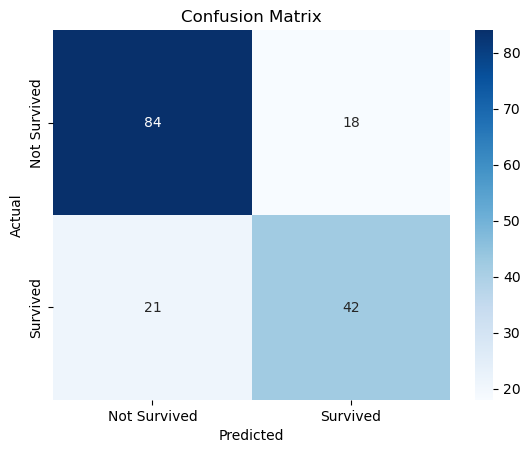

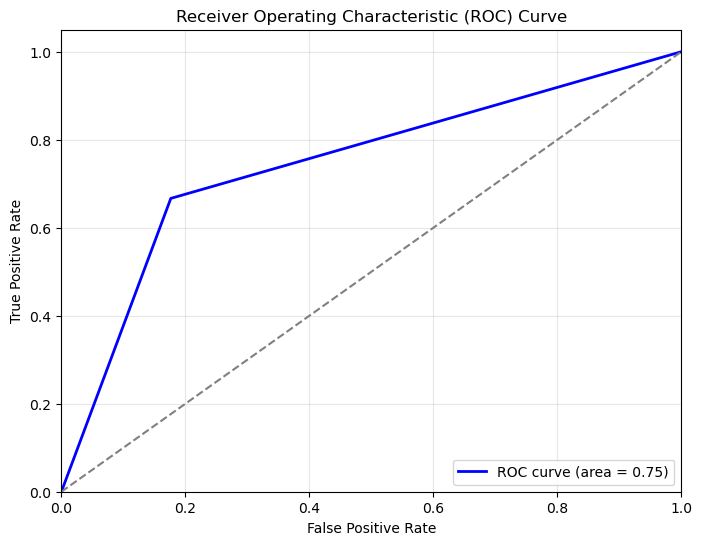

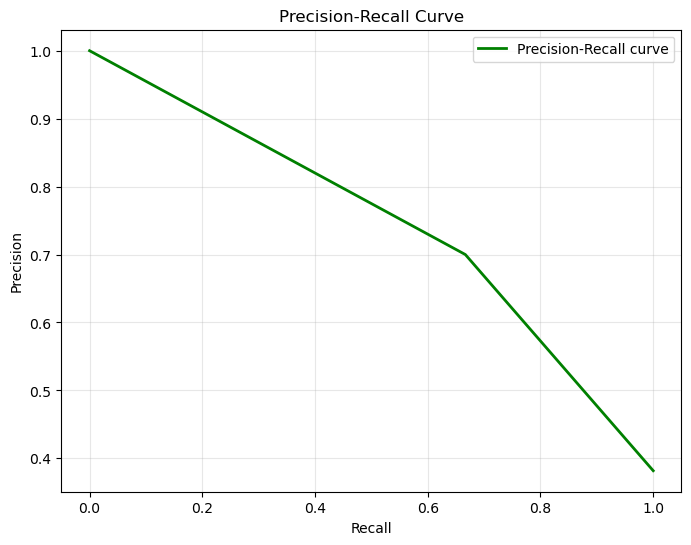

In [ ]:
# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(
    recall, precision, color="green", lw=2, label="Precision-Recall curve"
)  # Plot the Precision-Recall curve
plt.xlabel("Recall")  # X-axis label
plt.ylabel("Precision")  # Y-axis label
plt.title("Precision-Recall Curve")  # Title of the plot
plt.legend(loc="upper right")  # Place the legend in the upper-right corner
plt.grid(alpha=0.3)  # Add a faint grid for better readability
plt.show()  # Display the Precision-Recall curve